# Study parameters & Analysis results

In [1]:
# we create a dictionary that sums up all the quantities computed in the study
# initialized by the study parameters
study = {'Nobs':5, # number of observation (parameter of the study/analysis)
         'Nsample':100, # number of samples per observation (parameter of the study/analysis)
         'study_duration':'2 months'} 

In [10]:
# generate random data to analyze
import numpy as np
np.random.seed(10)

Y = [np.exp(np.random.randn(study['Nsample'])) for i in range(study['Nobs'])]

# mean and s.e.m
study['mean_value'] = np.round(np.mean(Y),3)
study['sem_value'] = np.round(np.std(np.mean(Y, axis=1)),3)

In [11]:
# statistical test, corelation across observations

from itertools import product
from scipy.stats import pearsonr

ccs, pvals = [], []
for i, y1 in enumerate(Y):
    for j, y2 in enumerate(Y[i+1:]):
        res = pearsonr(y1, y2)
        ccs.append(res[0])
        pvals.append(res[1])

study['cc_coef_over_obs_min'], study['cc_coef_over_obs_max'] = np.round(np.min(ccs),3), np.round(np.max(ccs),3)
study['cc_coef_over_obs_mean'] = np.round(np.mean(ccs),3)
study['cc_coef_over_obs_std'] = np.round(np.std(ccs),3)

study['cc_pval_over_obs_min'],study['cc_pval_over_obs_max'] = np.round(np.min(pvals),3), np.round(np.max(pvals),3)


In [12]:
import pprint
pprint.pprint(study)

{'Nobs': 5,
 'Nsample': 100,
 'cc_coef_over_obs_max': 0.223,
 'cc_coef_over_obs_mean': 0.055,
 'cc_coef_over_obs_min': -0.122,
 'cc_coef_over_obs_std': 0.103,
 'cc_pval_over_obs_max': 0.856,
 'cc_pval_over_obs_min': 0.026,
 'mean_value': 1.605,
 'sem_value': 0.13,
 'study_duration': '2 months'}


## Saving the study quantities

In [13]:
np.savez('../study.npz', **study) # we save it in the parent directory


> we have saved this dictionary and it can now be used as a `study_file` to generate manuscripts

> for example (in the parent directory), run: `finalyz templates/paper.txt --study_file study.npz` 

# Figures

In [6]:
# import graph_env
from datavyz import graph_env_manuscript as ge

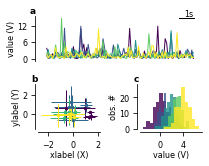

In [7]:
fig, AX = ge.figure(axes_extents=[[[2,1]],
                                 [[1,1],[1,1]]], hspace=0.8)

ge.plot(Y=Y,
        ax=AX[0][0],
        axes_args=dict(spines=['left'],ylabel='value (V)'))
ge.draw_bar_scales(AX[0][0], Xbar=10, Xbar_label='1s', loc='top-right')
ge.scatter(X=np.random.randn(4,5), sX=np.random.randn(4,5),
           Y=np.random.randn(4,5), sY=np.random.randn(4,5),
           ax=AX[1][0],
           axes_args={'xlabel':'xlabel (X)', 'ylabel':'ylabel (Y)'})
for i in range(5):
    AX[1][1].hist(np.random.randn(100)+i, color=ge.viridis(i/4), alpha=.8)
ge.set_plot(AX[1][1], xlabel='value (V)', ylabel='obs. #')

for i, ax in enumerate(ge.flat(AX)):
    ge.panel_label(ax, ge.int_to_letter(i))
    
ge.savefig(fig, './fig1.png')

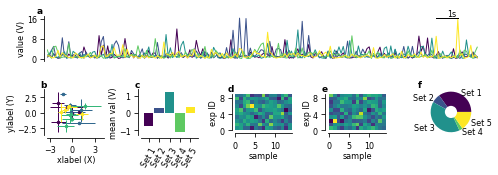

In [8]:
fig, AX = ge.figure(axes_extents=[[[5,1]],
                                 [[1,1],[1,1],[1,1],[1,1],[1,1]]], figsize=(.95,1.), right=2.)

np.random.seed(4)

ge.plot(Y=[np.exp(np.random.randn(200)) for i in range(5)],
        ax=AX[0][0],
        axes_args=dict(spines=['left'],ylabel='value (V)',xlim=[0,200]))

ge.draw_bar_scales(AX[0][0], Xbar=10, Xbar_label='1s', loc='top-right')
ge.scatter(X=np.random.randn(4,5), sX=np.random.randn(4,5),
           Y=np.random.randn(4,5), sY=np.random.randn(4,5),
           ax=AX[1][0],
           axes_args={'xlabel':'xlabel (X)', 'ylabel':'ylabel (Y)'})

ge.bar(1.5*np.random.randn(5), COLORS=[ge.viridis(i/4) for i in range(5)],
       ax=AX[1][1], axes_args=dict(ylabel='mean val (V)', xticks=np.arange(5), xticks_rotation=60,
                                   xticks_labels=['Set %i' % (i+1) for i in range(5)]))

ge.pie(np.random.uniform(0,1,5), ax=AX[1][4], COLORS=[ge.viridis(i/4) for i in range(5)],
       ext_labels=['Set %i' % (i+1) for i in range(5)])

ge.matrix(np.random.randn(15,10), ax=AX[1][2])
ge.matrix(np.random.randn(15,10), ax=AX[1][3])
for ax in [AX[1][2], AX[1][3]]:
    ge.set_plot(ax, xlabel='sample', ylabel='exp ID')                                                        
                                                             
for i, ax in enumerate(ge.flat(AX)):
    ge.panel_label(ax, ge.int_to_letter(i))
    
ge.savefig(fig, './fig2.png')

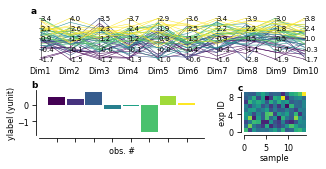

In [9]:
fig, AX = ge.figure(axes_extents=[[[3,1]],
                                 [[2,1],[1,1]]])

ge.parallel_plot(Y=np.concatenate([np.random.randn(10,10)+i*.5 for i in range(5)]),
                 COLORS=[ge.viridis(int(i/10)/4) for i in range(50)],
                 ax=AX[0][0])

ge.bar(np.random.randn(8),
       COLORS=[ge.viridis(i/7) for i in range(8)],
        ax=AX[1][0], ylabel='ylabel (yunit)', xlabel='obs. #')

ge.matrix(np.random.randn(15,10), ax=AX[1][1])
ge.set_plot(AX[1][1], xlabel='sample', ylabel='exp ID')

for i, ax in enumerate(ge.flat(AX)):
    ge.panel_label(ax, ge.int_to_letter(i))
    
ge.savefig(fig, './fig3.png')